## Load packages:

In [1]:
import allel
import pandas as pd
import seaborn as sns
import random
import zarr
import numpy as np
import vcf_processing_functions as vpf
from variables import *
import sys
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import zscore
import scipy

#%load_ext rpy2.ipython

sys.path.insert(1, '/home/clsj/GenerationInterval/people/moi/scripts')

## Load data:

In [ ]:
outgroup = np.loadtxt("{project}/people/moi/results/outgroup_{dataset}.txt".format(project = project, dataset = dataset), dtype=str)

pos_length_list = []

for chrom in lchromos:
    callset = zarr.open_group("/home/clsj/GenerationInterval/people/moi/sandbox/zar/{dataset}/{dataset}_chr{chrom}.zarr".format(dataset = dataset,chrom = chrom), mode='r')
    samples = callset["{chrom}/samples".format(chrom = chrom)][:]
    ingroup_idx = np.array([i for i in range(len(samples)) if samples[i] not in outgroup])
    all_filt, max_min_anc_filt, anc_der_map, ref_alt_alleles, anc_der_map_correct = vpf.get_filters_and_map(chrom = chrom, dataset = dataset, callset = callset, ingroup_idx = ingroup_idx, vervose = True)
    pos = callset["{chrom}/variants/POS".format(chrom = chrom)][:][all_filt][max_min_anc_filt]
    idx = allel.SortedIndex(pos)
    pos_length_list.append(idx[-1]-idx[0]+1)
    

In [ ]:
len(pos_length_list)

In [2]:
dataset = 'HGDP'
chrom = '22'
callset = zarr.open_group("/home/clsj/GenerationInterval/people/moi/sandbox/zar/{dataset}/{dataset}_chr{chrom}.zarr".format(dataset = dataset,chrom = chrom), mode='r')

In [3]:
samples = callset["{chrom}/samples".format(chrom = chrom)][:]

In [4]:
metadata = pd.read_table("~/GenerationInterval/people/moi/files/metadata.txt")
metadata = metadata[metadata['dat'] == dataset]

samples_dataset = pd.DataFrame({'ind': samples})
metadata = pd.merge(samples_dataset, metadata, how='inner', on = 'ind')

In [6]:
outgroup = np.loadtxt("{project}/people/moi/results/outgroup_{dataset}.txt".format(project = project, dataset = dataset), dtype=str)
ingroup_idx = np.array([i for i in range(len(samples)) if samples[i] not in outgroup])

In [7]:
all_filt, max_min_anc_filt, anc_der_map, ref_alt_alleles, anc_der_map_correct = vpf.get_filters_and_map(chrom = chrom, dataset = dataset, callset = callset, ingroup_idx = ingroup_idx, vervose = True)

If there is a warning in the next line, it is because there are positions that there is no individuals called, so when the allele frequency is calculated, there is a division by 0
Filters for chr22 for HGDP data
acc_filt          	shape = (1185008,)	True = 624675	perc = 52.71%
pas_filt          	shape = (1185008,)	True = 1160980	perc = 97.97%
snp_filt          	shape = (1185008,)	True = 1039904	perc = 87.76%
hwe_filt          	shape = (1185008,)	True = 1185008	perc = 100.0%
exc_filt          	shape = (1185008,)	True = 1185008	perc = 100.0%
max_min_filt      	shape = (1185008,)	True = 1179708	perc = 99.55%
anc_filt          	shape = (571988,)	True = 546240	perc = 95.5%
max_min_anc_filt  	shape = (571988,)	True = 540689	perc = 94.53%
all_filt          	shape = (1185008,)	True = 571988	perc = 48.27%


/faststorage/project/GenerationInterval/people/clsj/notebooks/vcf_processing_functions.py:103: RuntimeWarning: invalid value encountered in divide
  high_freq  = count_alleles[:, 1]/count_alleles.sum(axis = 1) > 0.95


In [8]:
pos = callset["{chrom}/variants/POS".format(chrom = chrom)][:][all_filt][max_min_anc_filt]

Here I take the populations that I want and put them in a list (pop_list) and I create a new list to put the indices in for each population (pop_idx).

For each population in pop_list, I then sample all the individuals from that population and take the indices and add them to the pop_idx list.
Pop_idx is then a list of lists.

I then flatten pop_idx to create just a list and then I sort it to use it in the dask array.

In [15]:
#pop_list = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
pop_list = ['Burusho','Hazara','Uygur']
pop_idx = []

for x in lpopulat:
    data = metadata[metadata['pop'] == x]
    samples = data.sample(n=len(data))
    idx = samples.index.tolist()

    pop_idx.append(idx)   
    
idx_list = [item for sublist in pop_idx for item in sublist]
idx_list.sort()
print(idx_list)

[6, 10, 24, 33, 41, 42, 43, 50, 51, 52, 53, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 113, 114, 116, 117, 118, 120, 122, 127, 128, 129, 130, 131, 132, 134, 138, 139, 142, 143, 145, 146, 148, 149, 151, 152, 153, 154, 155, 156, 157, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 

For each population in pop_idx, I create a new list. This list l will consist of the new index in the idx_list for each individual index in pop_idx. Each new list l with the new indices for each population, will then be added to a list called subpops.

In [16]:
subpops = []

for i in pop_idx:
    l = []
    for j in i:
        l.append(idx_list.index(j))
    subpops.append(l)
    
print(subpops)

[[309, 239, 189, 219, 644, 797, 33, 173, 218, 283, 190, 15, 645, 238, 284, 52, 316, 598, 267, 516, 204, 300, 511, 759], [771, 21, 259, 74, 262, 510, 213, 20, 203, 484, 487, 453, 472, 216, 812, 214, 14, 199, 225], [11, 183, 252, 200, 649, 813, 692, 5, 42, 789], [29, 9, 520, 582, 495, 714, 762, 469, 19, 16, 764], [736, 494, 811, 575, 798, 73, 66, 635, 633], [54, 689, 57, 748, 468, 37, 18, 22], [750, 23, 63, 804, 465, 523, 526], [724, 654, 777, 548, 53, 50, 497, 655, 807, 801, 522, 651], [760, 76, 802, 602, 6, 556, 71, 691], [581, 554, 46, 75, 552, 652, 521, 82, 766, 578, 758, 601, 700], [549, 77, 580, 584, 467, 551, 492, 674, 634, 496, 800, 519, 656, 61, 712, 632, 819, 464, 550, 657, 527], [261, 642, 230, 790, 191, 182, 233, 221, 217, 194, 245, 30, 187, 229, 768, 174, 223, 44, 249, 166, 232, 570, 55, 710, 242], [222, 237, 170, 669, 823, 201, 235, 198, 821], [227, 84, 220, 796, 177, 100, 234, 2, 567], [163, 169, 192, 767, 753, 594, 240, 258, 209], [809, 208, 130, 248, 196, 186, 257, 67, 8

Get the filters per dataset and the ancestral and derived alleles map

In [8]:
all_filt, max_min_anc_filt, anc_der_map, ref_alt_alleles, anc_der_map_correct = vpf.get_filters_and_map(chrom = chrom, dataset = dataset, callset = callset, ingroup_idx = idx_list, vervose = True)

If there is a warning in the next line, it is because there are positions that there is no individuals called, so when the allele frequency is calculated, there is a division by 0
Filters for chr1 for HGDP data
acc_filt          	shape = (6330165,)	True = 4001205	perc = 63.21%
pas_filt          	shape = (6330165,)	True = 6285914	perc = 99.3%
snp_filt          	shape = (6330165,)	True = 5606321	perc = 88.57%
hwe_filt          	shape = (6330165,)	True = 6330165	perc = 100.0%
exc_filt          	shape = (6330165,)	True = 6330165	perc = 100.0%
max_min_filt      	shape = (6330165,)	True = 6304996	perc = 99.6%
anc_filt          	shape = (3653063,)	True = 3602028	perc = 98.6%
max_min_anc_filt  	shape = (3653063,)	True = 3567266	perc = 97.65%
all_filt          	shape = (6330165,)	True = 3653063	perc = 57.71%


/faststorage/project/GenerationInterval/people/clsj/notebooks/vcf_processing_functions.py:103: RuntimeWarning: invalid value encountered in divide
  high_freq  = count_alleles[:, 1]/count_alleles.sum(axis = 1) > 0.95


Here I create a dictonary for the allele counts. 
For each list number x in pop_idx, I create a key with the name of the population and then I create allele counts arrays.

- With take() I only take the indices from the idx_list.
- With compress() I apply the allele filter that filters for positions that are not included in the bed file ranges (acc_filt), PASS flag filter FILTER_ExcHet (pas_filt), indel positions is_snp (snp_filt), positions that have only first and second maximum frequency alleles (max_min_filt), excess heterozygosity (exc_filt), and HWE test (hwe_filt)
- With compress() I filter for ancestry (max_min_anc_filt).


In [17]:
ac_list = {}
for x in range(len(pop_idx)):
    ac_list[pop_list[x]] = (allel.GenotypeDaskArray(callset["{chrom}/calldata/GT".format(chrom = chrom)])
                                .take(idx_list, axis=1)
                                .compress(all_filt, axis = 0)
                                .compress(max_min_anc_filt, axis = 0)
                                .map_alleles(anc_der_map)
                                .map_alleles(anc_der_map_correct)
                                .count_alleles(subpop = np.array(subpops[x]))
                                .compute())

IndexError: list index out of range

In [15]:
ac_list

<AlleleCountsArray shape=(540689, 2) dtype=int32>
36  0
38  0
38  0
...
48  0
48  0
48  0

Calculating pairwise Dxy using sequence_divergence(). For each allele counts array in ac_list, the array will be compared pairwise to all other arrays and a Dxy value will be calculated and added to d_list.

In [58]:
i_list = []
j_list = []
d_list = []
for i in ac_list:
    for j in ac_list:
        i_list.append(i)
        j_list.append(j)
        d_list.append(allel.sequence_divergence(pos, ac_list[i], ac_list[j]))

The Dxy values are then saved in a dataframe together with the two populations compared for each value. The D values are then normalized using z-score, and the diagonal is manually changed to 0.

The heat map is then made by manually setting the order for column and row.

In [ ]:
# Save dataframe with Dxy values:
d = {'i': i_list, 'j': j_list, 'D': d_list}
df = pd.DataFrame(data=d)

# Normalize data using z-score:
df_sklearn = df.copy()
df_sklearn['D_norm'] = zscore(df_sklearn['D'])

# Change values in the diagonal to zero:
df_sklearn.loc[df["i"] == df['j'], "D_norm"] = 0
df_sklearn.loc[df["i"] == df['j'], "D"] = 0

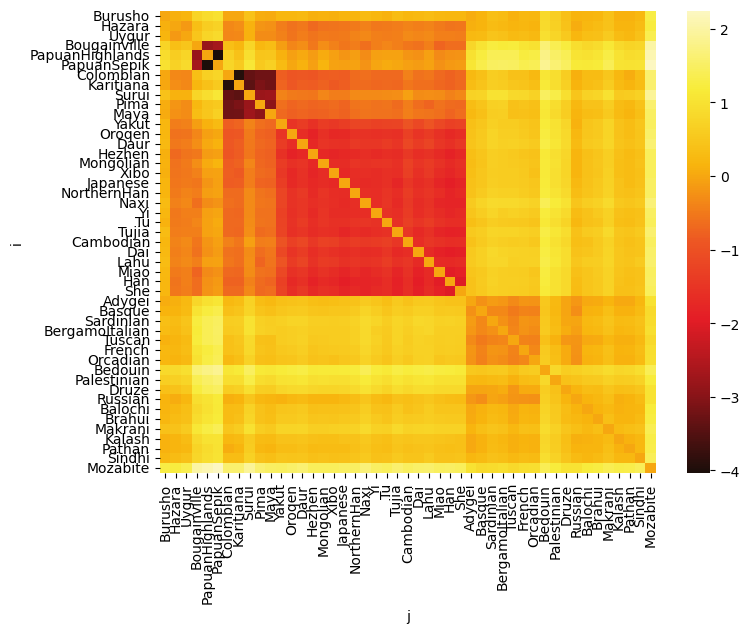

In [63]:


# Make plot:
result = df_sklearn.pivot(index='i',columns='j',values='D')

column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = result[column_order][row_order]
table4 = table3.reindex(row_order)

fig, ax = plt.subplots(figsize=(8, 6))
heat_map = sns.heatmap(table4, linewidth = 0, xticklabels=True,yticklabels=True, cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True))
plt.savefig('chr{chrom}.png'.format(chrom = chrom))